## 编写K-means算法

In [15]:
import numpy as np

def k_means(data, k, max_iterations=100):
    # 初始化聚类中心
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    
    for _ in range(max_iterations):
        # 计算每个样本到各个聚类中心的距离
        distances = np.linalg.norm(data - centroids[:, np.newaxis], axis=2)
        
        # 将每个样本分配到距离最近的聚类中心
        labels = np.argmin(distances, axis=0)
        
        # 更新聚类中心
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # 计算损失函数值
        loss = np.sum(np.square(np.linalg.norm(data - new_centroids[labels])))
        
        # 如果聚类中心不再发生变化，停止迭代
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids, loss

In [16]:
file_path = 'D:\\BaiduSyncdisk\\机器学习\\shangji\\data\\kmeans.txt'

# 读取数据到NumPy数组
data_matrix = np.loadtxt(file_path, dtype=float, usecols=(0, 1), delimiter=' ')

### 对kmeans.txt数据进行聚类

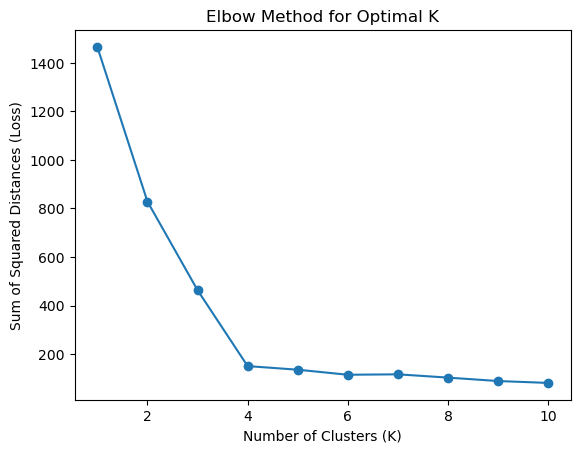

In [17]:
import matplotlib.pyplot as plt


# 尝试不同的聚类数并计算损失函数值
losses = []
k_values = range(1, 11)  # 尝试聚类数从1到10
for k in k_values:
    label, center, loss_value = k_means(data_matrix, k)
    losses.append(loss_value)

# 绘制碎石图
plt.plot(k_values, losses, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Loss)')
plt.show()

选择聚类数k=4

In [18]:
label, center, loss_value = k_means(data_matrix, 4)

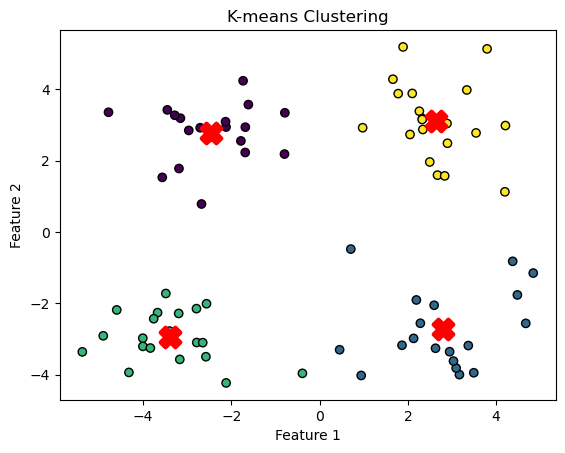

In [19]:
plt.scatter(data_matrix[:, 0], data_matrix[:, 1], c=label, cmap='viridis', edgecolors='k')
plt.scatter(center[:, 0], center[:, 1], marker='X', s=200, linewidths=3, color='red')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 调用sklearn对kmeans.txt数据聚类

In [20]:
from sklearn.cluster import KMeans

In [21]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


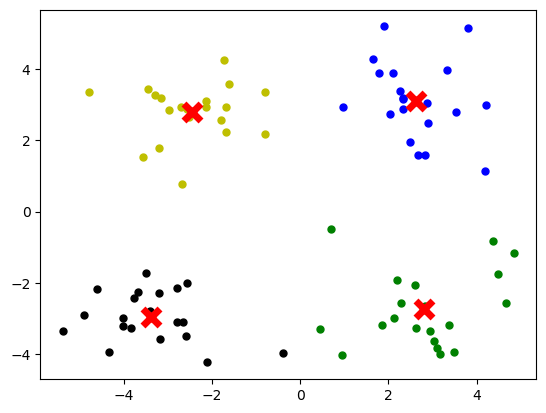

In [22]:
kmeans = KMeans(n_clusters=4, n_init='auto')

# 进行聚类
kmeans.fit(data_matrix)

# 获取每个数据点的标签
labels = kmeans.labels_

# 获取每个簇的中心点
centers = kmeans.cluster_centers_

# 可视化聚类结果
colors = ["k.", "b.", "g.", "y."]

for i in range(len(data_matrix)):
    plt.plot(data_matrix[i][0], data_matrix[i][1], colors[labels[i]], markersize=10)

plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=150, linewidths=5, zorder=10, color='red')
plt.show()

In [23]:
kmeans.inertia_

149.95430467642637

调用sklearn的结果与自己编写的聚类结果相同

## 编写DBscan算法

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue
from sklearn.neighbors import NearestNeighbors

In [40]:
import numpy as np

class DBscan:
    def __init__(self, min_samples=10, eps=0.15):
        self.min_samples = min_samples
        self.eps = eps
        self.X = None
        self.label = None
        self.n_class = 0

    def fit(self, X):
        self.X = X
        self.label = np.zeros(X.shape[0])
        for i in range(len(self.X)):
            if self.label[i] != 0:
                continue

            neighbors = self.region_query(i)
            if len(neighbors) < self.min_samples:
                self.label[i] = 0  # 标记为离群点
            else:
                self.n_class += 1
                self.expand_cluster(i, neighbors)

    def region_query(self, i):
        return np.where(np.sqrt(np.sum((self.X - self.X[i])**2, axis=1)) <= self.eps)[0]

    def expand_cluster(self, i, neighbors):
        self.label[i] = self.n_class
        j = 0
        while j < len(neighbors):
            neighbor_idx = neighbors[j]
            if self.label[neighbor_idx] == -1:
                self.label[neighbor_idx] = self.n_class
            elif self.label[neighbor_idx] == 0:
                self.label[neighbor_idx] = self.n_class
                new_neighbors = self.region_query(neighbor_idx)
                if len(new_neighbors) >= self.min_samples:
                    neighbors = np.concatenate((neighbors, new_neighbors))
            j += 1

    def plot_dbscan(self):
        plt.rcParams['font.sans-serif'] = ["SimHei"]
        plt.rcParams['axes.unicode_minus']=False
        for i in range(self.n_class+1):
            if i == 0:
                label = 'Anomaly data'
            else:
                label = 'Class'+str(i)
            plt.scatter(self.X[self.label==i,0], self.X[self.label==i,1],label=label)
        plt.legend(loc='upper left',fontsize='small', bbox_to_anchor=(1.0, 1.0))
        plt.show()      


### 观察eps值对聚类结果的影响

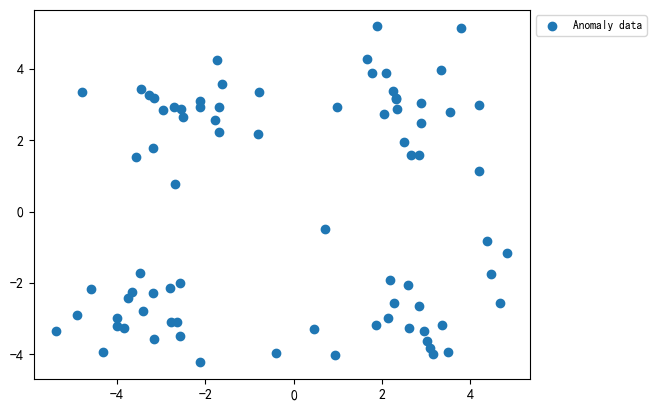

In [41]:
db_0 = DBscan(10, 0.5)
db_0.fit(data_matrix)
db_0.plot_dbscan()

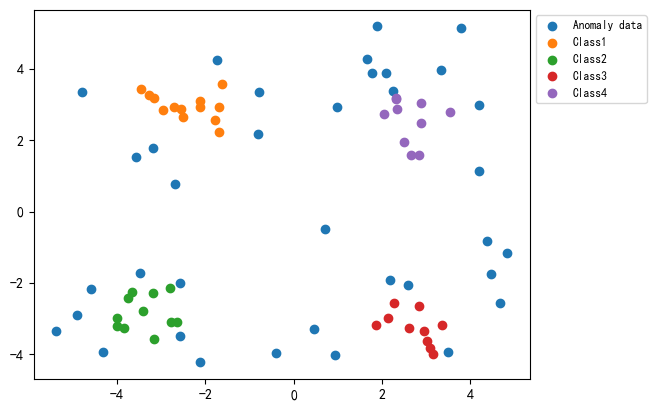

In [42]:
db = DBscan(10, 1)
db.fit(data_matrix)
db.plot_dbscan()

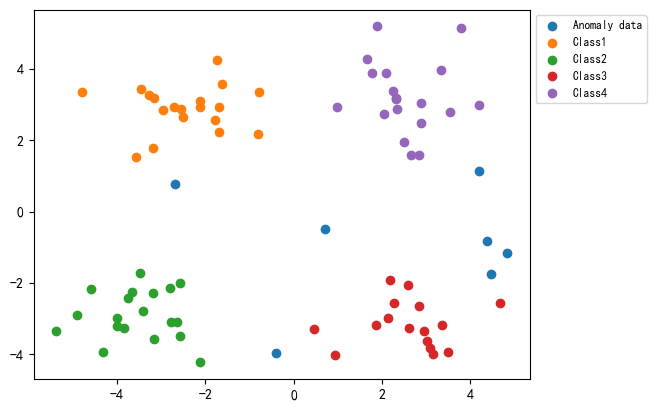

In [43]:
db_1 = DBscan(10, 1.5)
db_1.fit(data_matrix)
db_1.plot_dbscan()

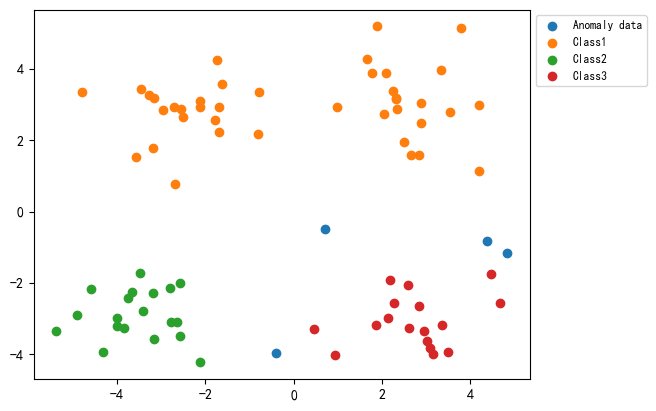

In [44]:
db_2 = DBscan(10, 2)
db_2.fit(data_matrix)
db_2.plot_dbscan()

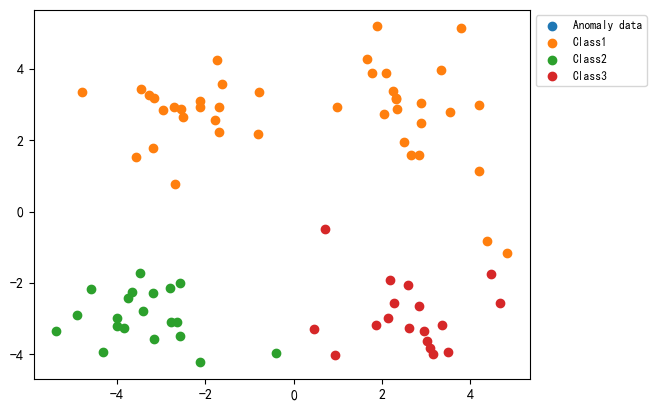

In [45]:
db_3 = DBscan(10, 2.5)
db_3.fit(data_matrix)
db_3.plot_dbscan()

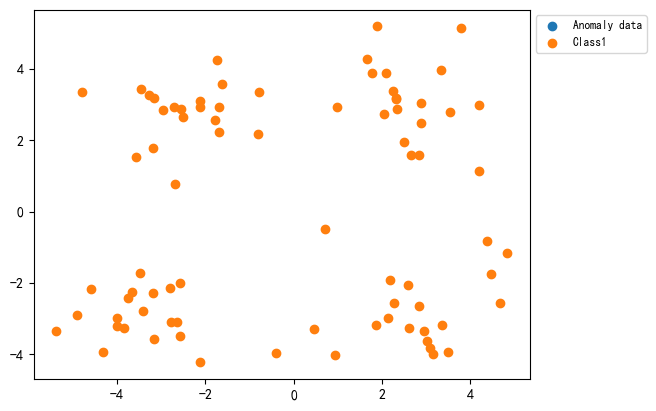

In [46]:
db_4 = DBscan(10, 5)
db_4.fit(data_matrix)
db_4.plot_dbscan()

可以发现，随着eps值的增大，噪点减少，更多的点被聚类。
* eps过大，则更多的点会落在核心对象的ϵ-邻域，此时类别数可能会减少，本来不应该是一类的样本也会被划为一类
* 反之则类别数可能会增大，本来是一类的样本却被划分开

### 探究min_samples值对聚类结果的影响

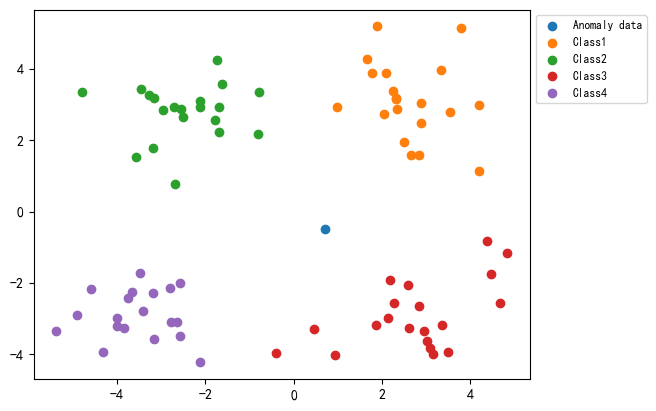

In [47]:
db_5 = DBscan(2, 1.5)
db_5.fit(data_matrix)
db_5.plot_dbscan()

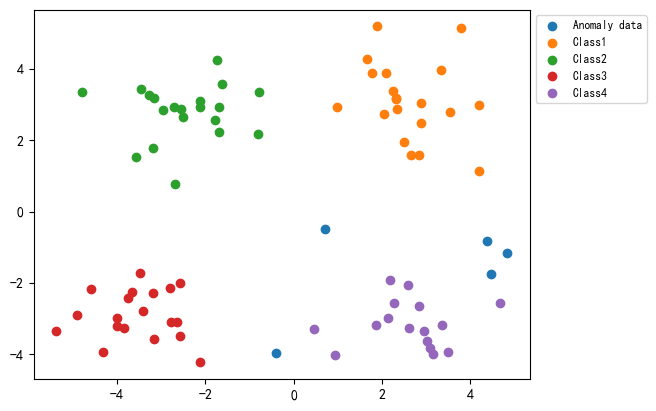

In [48]:
db_6 = DBscan(5, 1.5)
db_6.fit(data_matrix)
db_6.plot_dbscan()

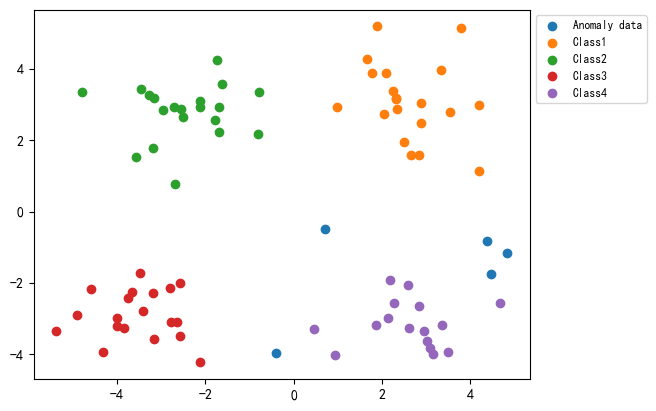

In [49]:
db_7 = DBscan(7, 1.5)
db_7.fit(data_matrix)
db_7.plot_dbscan()

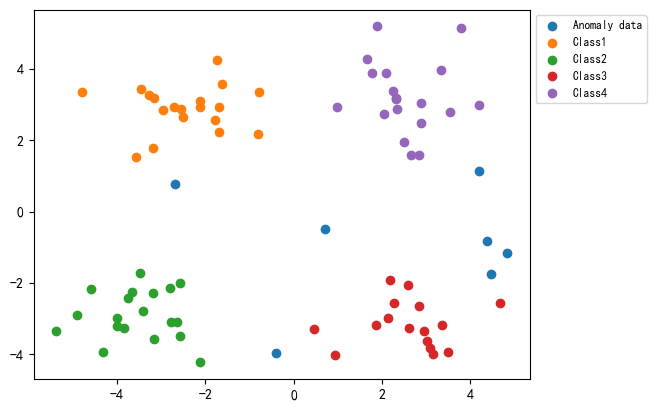

In [50]:
db_8 = DBscan(10, 1.5)
db_8.fit(data_matrix)
db_8.plot_dbscan()

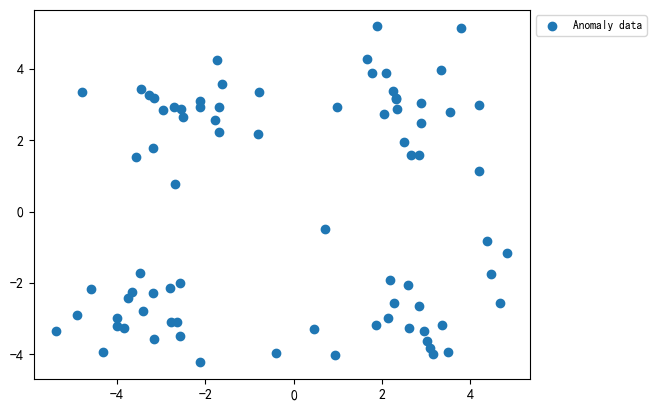

In [51]:
db_9 = DBscan(21, 1.5)
db_9.fit(data_matrix)
db_9.plot_dbscan()

* 在eps一定的情况下，min_samples过大，则核心对象会过少，此时簇内部分本来是一类的样本可能会被标为噪音点
* 反之min_samples过小的话，则会产生大量的核心对象，可能会导致类别数过少

### 参数选择

#### 1. min_samples的选择

查阅资料，min_samples的值通常取数据的维度数+1，本数据集中数据维度为2，因此取min_samples=2+1=3

#### 2. eps的选择

查阅资料，选择eps的方法与k-means的方法类似

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors


def select_MinPts(data,k):
    k_dist = []
    for i in range(data.shape[0]):
        dist = (((data[i] - data)**2).sum(axis=1)**0.5)
        dist.sort()
        k_dist.append(dist[k])
    return np.array(k_dist)

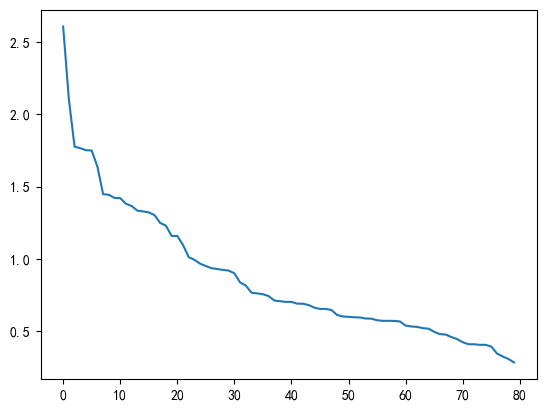

In [53]:
k = 3
k_dist = select_MinPts(data_matrix,k)
k_dist.sort()
plt.plot(np.arange(k_dist.shape[0]),k_dist[::-1])

观察图，选取eps值为1.5

### 参数选取后进行聚类

#### 调用自己编写的DBSCAN类进行聚类

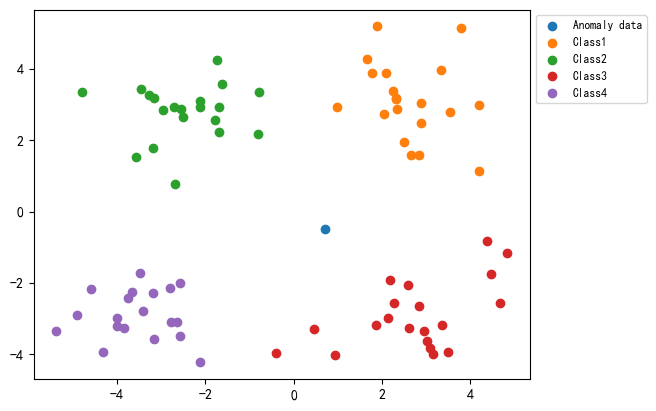

In [54]:
db_b = DBscan(3, 1.5)
db_b.fit(data_matrix)
db_b.plot_dbscan()

#### 调用sklearn库进行聚类

In [55]:
from sklearn.cluster import DBSCAN

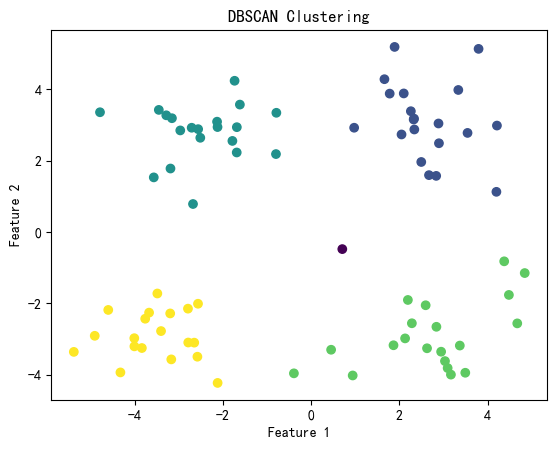

In [56]:
# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=1.5, min_samples=4)
labels = dbscan.fit_predict(data_matrix)

# 绘制聚类结果
plt.scatter(data_matrix[:, 0], data_matrix[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

对比发现，聚类结果完全相同！！！

## DBscan 算法和 K-means Clustering 算法区别的比较

### 1. 生成数据

In [77]:
from sklearn import datasets

In [93]:
x1, y1 = datasets.make_circles(n_samples=2000, factor=0.5, noise=0.05, random_state=1017)

In [94]:
x2, y2 = datasets.make_blobs(n_samples=1000, centers=[[1.2,1.2]], cluster_std=[[.1]], random_state=1017)

In [95]:
x1

array([[ 0.49324158,  0.06001314],
       [-0.11967198, -0.50702634],
       [-0.4716087 ,  0.13935879],
       ...,
       [-0.44104263, -0.23146288],
       [-0.63817222, -0.75813705],
       [ 0.96633596,  0.26867619]])

In [96]:
y1

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [97]:
x2

array([[1.25497292, 1.12360324],
       [1.11763046, 1.084648  ],
       [1.32709672, 1.13245251],
       ...,
       [1.35223657, 1.36951974],
       [1.07507475, 1.19917369],
       [1.08792715, 1.3202326 ]])

In [98]:
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
# 将向量纵向拼接
x_all = np.vstack((x1, x2)) 
y_all = np.concatenate((y1, y2))

### 2.聚类

#### F1：K-means

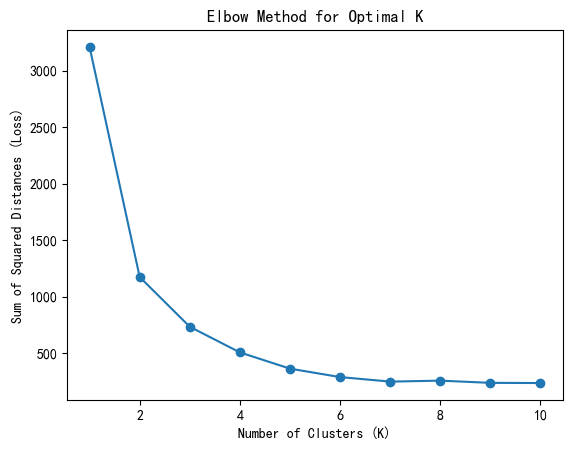

In [100]:
# 尝试不同的聚类数并计算损失函数值
losses = []
k_values = range(1, 11)  # 尝试聚类数从1到10
for k in k_values:
    label, center, loss_value = k_means(x_all, k)
    losses.append(loss_value)

# 绘制碎石图
plt.plot(k_values, losses, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Loss)')
plt.show()

观察碎石图，选定k=3

In [101]:
label, center, loss_value = k_means(x_all, 3)

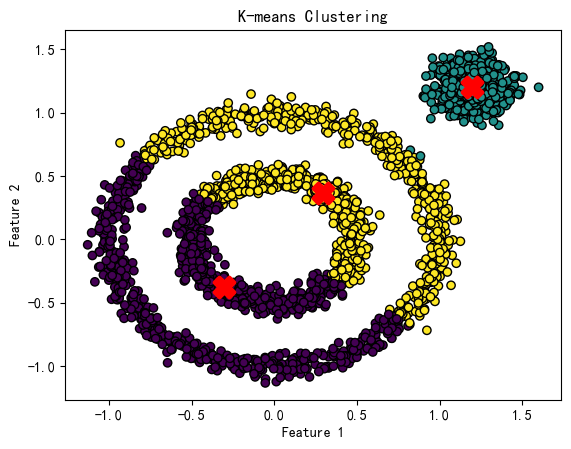

In [102]:
plt.scatter(x_all[:, 0], x_all[:, 1], c=label, cmap='viridis', edgecolors='k')
plt.scatter(center[:, 0], center[:, 1], marker='X', s=200, linewidths=3, color='red')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### F2：DBscan

选定min_samples = num(dimentions)+1 =2+1=3

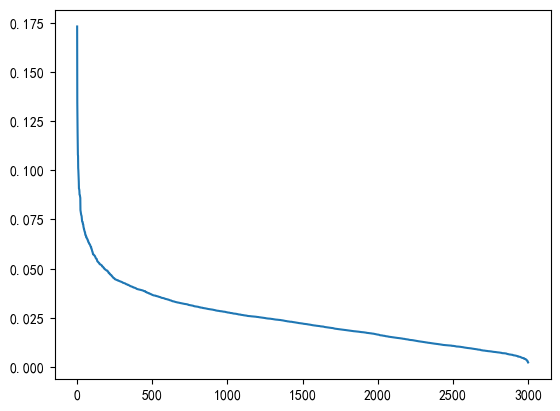

In [103]:
k = 3
k_dist = select_MinPts(x_all,k)
k_dist.sort()
plt.plot(np.arange(k_dist.shape[0]),k_dist[::-1])

选取eps = 0.05

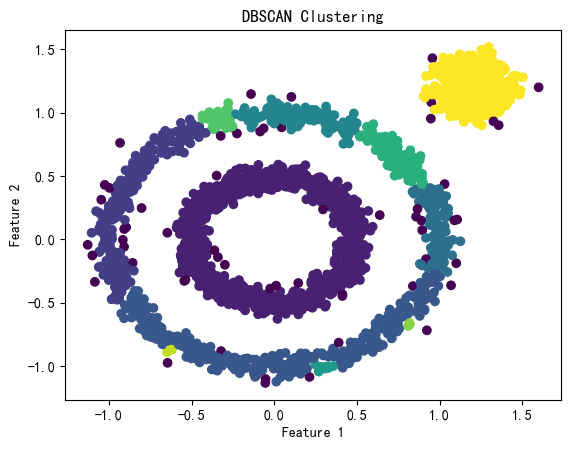

In [104]:
# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=0.05, min_samples=3)
labels = dbscan.fit_predict(x_all)

# 绘制聚类结果
plt.scatter(x_all[:, 0], x_all[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

选取eps=0.06

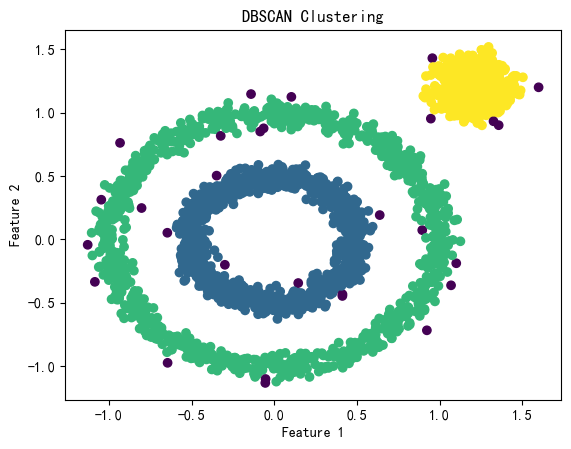

In [110]:
# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=0.06, min_samples=3)
labels = dbscan.fit_predict(x_all)

# 绘制聚类结果
plt.scatter(x_all[:, 0], x_all[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

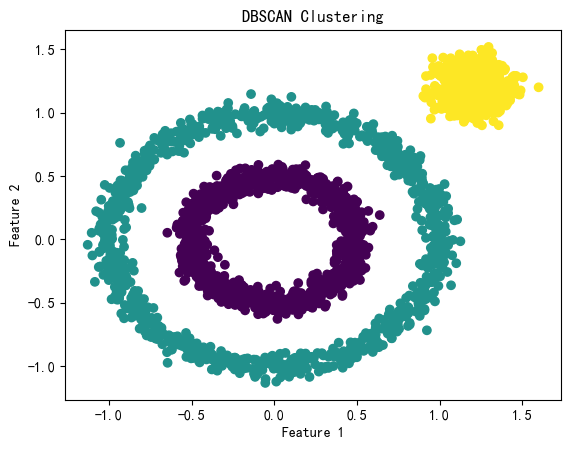

In [111]:
# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=0.2, min_samples=50)
labels = dbscan.fit_predict(x_all)

# 绘制聚类结果
plt.scatter(x_all[:, 0], x_all[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

* 由两种算法的对比可见，k-means无法很好处理环形聚类，而是倾向于将他们线性划分成两类
* DBscan算法则能够很好处理环形数据的情况